In [1]:
import numpy as np
from rdkit import Chem
from pyscf import gto, scf, dft, tddft,tdscf

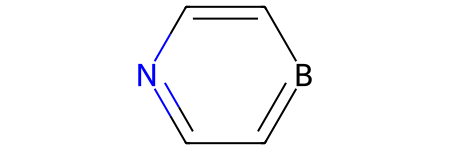

In [2]:

# Étape 1: Convertir le SMILES en objet RDKit Mol
smiles = "B1=CC=NC=C1"
mol = Chem.MolFromSmiles(smiles)
mol

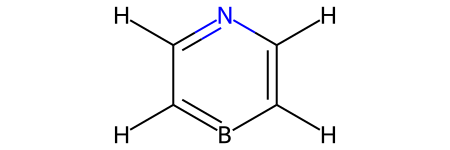

In [3]:
mol = Chem.AddHs(mol)
mol

In [4]:
mol.GetNumAtoms()

10

In [5]:
# import libraries
from rdkit.Chem import AllChem
from rdkit import Chem

[14:48:40] UFFTYPER: Unrecognized atom type: B_1 (0)


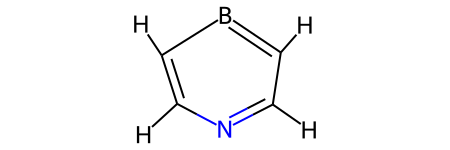

In [6]:
confid = AllChem.EmbedMolecule(mol)
mol

[14:48:40] UFFTYPER: Unrecognized atom type: B_1 (0)


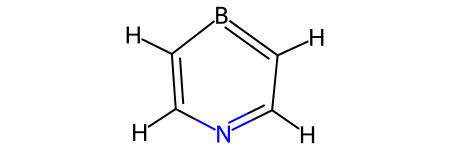

In [7]:
AllChem.UFFOptimizeMolecule(mol)
mol

In [8]:
confid

0

In [9]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

B -0.05387509603457605 1.6688132382610608 -0.11634979923040573
C 1.345939981549208 0.6618032977757016 -0.022512549368026557
C 1.2083339661900099 -0.7150484297720331 0.07033545884053158
N -0.01025878134554879 -1.314222983630718 0.09071709399564729
C -1.2111482076486135 -0.6832619050792265 0.026325775247813668
C -1.3090804607873874 0.6966842455406796 -0.07080632958252399
H 2.328454353367305 1.11442846745583 -0.03683819396295661
H 2.096794402255349 -1.3297523719974347 0.12820336438155297
H -2.1169620696457985 -1.2743930887515613 0.05155647143090062
H -2.2781980878999355 1.174949530197687 -0.12063129175259082


In [10]:
ab=Chem.MolToXYZBlock(mol)

### suppressions d'une ligne de  la premiere ligne 

In [11]:
atom='\n'.join((ab).strip().split('\n'))[2:]

In [12]:
print(atom)



B     -0.053875    1.668813   -0.116350
C      1.345940    0.661803   -0.022513
C      1.208334   -0.715048    0.070335
N     -0.010259   -1.314223    0.090717
C     -1.211148   -0.683262    0.026326
C     -1.309080    0.696684   -0.070806
H      2.328454    1.114428   -0.036838
H      2.096794   -1.329752    0.128203
H     -2.116962   -1.274393    0.051556
H     -2.278198    1.174950   -0.120631


## _creation de l'objet gto_mol._

In [13]:
mol=gto.Mole(atom=atom,
charge = 0  ,
spin = 0, 
basis = '6-31g',
cart=False,
#ecp='lanl2dz',
unit='Angstrom',
verbose=0,
symmetry=True       )
mol.build()

## calcule de HF

In [14]:
mol_pyscf=mol

In [15]:
from pyscf import gto, scf
# Définition du chemin de sortie du fichier
mf.output_file = './Documents/my_data_RHF.txt'

# Initialisation de l'objet RHF
mf = scf.RHF(mol)

# Niveau de verbosité pour l'objet mf
mf.verbose = 4

# Chemin du fichier chk
chk_file = './Documents/my_data_RHF.chk'

# Vérification de l'existence du fichier chk
if os.path.exists(chk_file):
    print('Le fichier chk existe')
    dm = mf.from_chk(chk_file)
    mf.kernel(dm)
else:
    print('Le fichier chk n\'existe pas')
    mf.chkfile = chk_file
    mf.kernel()

# Analyse du calcul RHF


# Écriture des résultats dans le fichier de sortie
with open(output_file, 'w') as f:
    f.write(mf.analyze())

print("Le calcul RHF est terminé. Les résultats ont été enregistrés dans le fichier {}.".format(output_file))

NameError: name 'mf' is not defined

In [17]:
from pyscf.lib import chkfile
import os
mol_pyscf.path_output='./Documents/my_data_RHF.txt'# 
mf=scf.RHF(mol_pyscf)# Restrictred car on travail avec une molecule de spin S=
mf.verbose=4 #controle the print level for the mean field objet
path_HF='./Documents/my_data_RHF.chk'#
if os.path.exists(path_HF):
    print('chkfile exist')
    dm=mf.from_chk(path_HF)
    mf.kernel(dm)
else :
    print('chkfile does not exist')
    mf.chkfile=path_HF
    
    mf.kernel()
mf.analyze()

chkfile exist


******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/mvoto/tmpkkqckfuw
max_memory 4000 MB (current use 199 MB)
Set gradient conv threshold to 3.16228e-05
init E= -232.379269953603
HOMO (A") = -0.33434222420285  LUMO (A') = -0.183581943043139
cycle= 1 E= -232.577758848011  delta_E= -0.198  |g|= 0.383  |ddm|=  1.9
HOMO (A") = -0.271198591263051  LUMO (A') = -0.0714194257432946
cycle= 2 E= -232.631571996898  delta_E= -0.0538  |g|= 0.239  |ddm|= 0.774
HOMO (A") = -0.302260454591879  LUMO (A') = -0.0272339385174133
cycle= 3 E= -232.653113901784  delta_E= -0.0215  |g|= 0.0629  |ddm|= 0.26
HOMO (A") = -0.30638488983868  LUMO (A') = -0.0263819229383401
cycle= 4 E= -232.

((array([1.99987447e+00, 9.47784963e-01, 3.52943757e-03, 9.12714741e-01,
         1.19447071e-01, 7.67856256e-01, 1.20088779e-02, 3.64401408e-03,
         1.15266989e-03, 1.99998392e+00, 1.03169726e+00, 3.69965087e-03,
         1.07275523e+00, 1.02508209e+00, 1.06502265e+00, 3.47999155e-03,
         6.17516609e-03, 6.33882909e-03, 1.99998352e+00, 9.68629222e-01,
         7.42818936e-03, 1.01272955e+00, 1.00507827e+00, 9.60042346e-01,
         8.39522794e-03, 1.42608630e-02, 1.92003501e-03, 1.99997891e+00,
         1.36418465e+00, 7.01706100e-03, 1.07223239e+00, 1.67232840e+00,
         1.16725546e+00, 6.72056854e-03, 1.41720490e-02, 7.65411075e-03,
         1.99998361e+00, 9.68355721e-01, 7.42536918e-03, 1.01850328e+00,
         9.99839217e-01, 9.41911917e-01, 8.18158005e-03, 1.46023839e-02,
         2.00506718e-03, 1.99998249e+00, 1.00097963e+00, 3.78037146e-03,
         1.11049938e+00, 1.04450267e+00, 1.07254401e+00, 3.66443253e-03,
         5.89502953e-03, 5.78111715e-03, 8.80770266

# HF sans restriction

In [18]:
#mf.analyze()# analyse et imprime dans le fichiers my_data

In [19]:
dip_mt=mf.dip_moment(mf.mol)
spin2,spinm=mf.spin_square()

Dipole moment(X, Y, Z, Debye): -0.11015,  4.27973, -0.29790


In [20]:
# etat syngulaire 
print('spin up:',spin2)

spin up: 0


In [ ]:
pr

In [21]:

#mf=scf.RKS(mol)
#mf=scf.UHF(mol)
mf.conv_tol=1e-12
mf.conv_tol_grad=1e-8
mf.direct_scf_tol=1e-13
mf.init_guess='atom'
mf.max_cycle=100
mf.max_memory=8000
mf.verbose=0
 
mf.kernel()


-232.6638753555249

In [22]:
#mf.xc='wB97M-V'
#mf.nlc='VV10'
#mf.xc='B3LYP'

In [23]:
mf.grids.becke_scheme=dft.gen_grid.original_becke
mf.grids.prune=None
mf.grids.radi_method=dft.radi.gauss_chebyshev
mf.grids.radii_adjust=None
mf.grids.verbose=4
mf.small_rho_cutoff=1e-10

In [23]:
homo = mf.mo_energy[mol.nelectron // 2 - 1]
lumo = mf.mo_energy[mol.nelectron // 2]
gap = lumo - homo
print(homo)
print(lumo)
print(gap)

-0.3058995014469985
-0.020210137022473696
0.2856893644245248


In [24]:
np.where(mf.mo_occ==0)[0][0]

20

In [25]:
np.where(mf.mo_occ>0)[0][-1]

19

In [26]:
mf?

Signature:      mf(*args, **kwargs)
Type:           SymAdaptedRHF
String form:    SymAdaptedRHF-RHF object of <class 'pyscf.scf.hf_symm.SymAdaptedRHF'>
File:           ~/anaconda3/envs/qiskit-env/lib/python3.11/site-packages/pyscf/scf/hf_symm.py
Docstring:     
SCF base class.   non-relativistic RHF.

Attributes:
    verbose : int
        Print level.  Default value equals to :class:`Mole.verbose`
    max_memory : float or int
        Allowed memory in MB.  Default equals to :class:`Mole.max_memory`
    chkfile : str
        checkpoint file to save MOs, orbital energies etc.  Writing to
        chkfile can be disabled if this attribute is set to None or False.
    conv_tol : float
        converge threshold.  Default is 1e-9
    conv_tol_grad : float
        gradients converge threshold.  Default is sqrt(conv_tol)
    max_cycle : int
        max number of iterations.  If max_cycle <= 0, SCF iteration will
        be skiped and the kernel function will compute only the total
        ene

In [27]:
# Étape 5: Afficher l'occupation des MO, le HOMO, le LUMO et leur énergie et écart
mo_energies = mf.mo_energy
mo_occ = mf.mo_occ
n_elec=mol.nelectron
homo_index = np.where(mf.mo_occ > 0)[0][-1]
lumo_index = np.where(mf.mo_occ == 0)[0][0]
#lumo_index = homo_index + 1
homo_energy = mo_energies[homo_index]
lumo_energy = mo_energies[lumo_index]
gap = lumo_energy - homo_energy
print('nombres d electrons:',n_elec)
print('homo index:',homo_index)
print('lumo index:',lumo_index)
print("MO Occupancy:")
print(mo_occ)
print(f"HOMO Index: {homo_index}, Energy: {homo_energy} Hartree")
print(f"LUMO Index: {lumo_index}, Energy: {lumo_energy} Hartree")
print(f"Gap: {gap} Hartree")

nombres d electrons: 40
homo index: 19
lumo index: 20
MO Occupancy:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
HOMO Index: 19, Energy: -0.3058995014469985 Hartree
LUMO Index: 20, Energy: -0.020210137022473696 Hartree
Gap: 0.2856893644245248 Hartree


In [126]:
from pyscf.data import nist
au2ev=nist.HARTREE2EV

In [28]:
from pyscf.lib import chkfile
import os
mol_pyscf.path_output='./Documents/my_data_dft.txt'# chemin des contenant les calcule de dft
path_dft='./Documents/my_data_dft.chk'#creation contenant d'une fichier dft
m_dft = dft.RKS(mol)# RKS car on travail avec une molecule de spin S\
#m_dft.xc='wB97M-V'
#m_dft.nlc='VV10'
m_dft.xc='B3LYP'
m_dft.verbose=4 #controle the print level for the mean field objet
if os.path.exists(path_dft):
    print('chkfile exist')
    dm_dft=m_dft.from_chk(path_dft)
    m_dft.kernel(dm_dft)
else :
    print('chkfile does not exist')
    m_dft.chkfile=path_dft
    
    m_dft.kernel()
m_dft.analyze()

chkfile exist


******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/mvoto/tmprf8lgvo9
max_memory 4000 MB (current use 220 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3LYP
    P. A. M. Dirac.,  Math. Proc. Cambridge Philos. Soc. 26, 376 (1930)
    F. Bloch.,  Z. Phys. 57, 545 (1929)
    A. D. Becke.,  Phys. Rev. A 38, 3098 (1988)
    C. Lee, W. Yang, and R. G. Parr.,  Phys. Rev. B 37, 785 (1988)
    B. Miehlich, A. Savin, H. Stoll, and H. Preuss.,  Chem. Phys. Lett. 157, 200 (1989)
    S. H. Vosko, L. Wilk, and M. Nusair.,  Can. J. Phys. 58, 1200 (1980)
small_rho_cuto

((array([1.99967663e+00, 9.90444480e-01, 3.50444593e-03, 8.67483606e-01,
         2.42683038e-01, 7.32219691e-01, 1.33594394e-02, 4.17326293e-03,
         2.10815760e-04, 1.99988667e+00, 1.04883090e+00, 4.18137519e-03,
         1.09395571e+00, 9.98559175e-01, 1.03180006e+00, 4.69890779e-03,
         8.20804629e-03, 1.52131870e-03, 1.99988628e+00, 9.71080356e-01,
         7.57428414e-03, 1.00564169e+00, 1.00135175e+00, 1.00803195e+00,
         9.71517090e-03, 1.54483150e-02, 4.12598958e-04, 1.99990947e+00,
         1.34509304e+00, 6.93579261e-03, 1.07818594e+00, 1.58785725e+00,
         1.18485177e+00, 9.28066372e-03, 9.45060571e-03, 2.54450753e-03,
         1.99988650e+00, 9.71308905e-01, 7.51794623e-03, 1.01132158e+00,
         9.94218101e-01, 9.94771050e-01, 9.50273128e-03, 1.57020422e-02,
         5.26018958e-04, 1.99988210e+00, 1.01377962e+00, 4.35026540e-03,
         1.12766691e+00, 1.01916406e+00, 1.04119101e+00, 5.08331038e-03,
         7.92382149e-03, 1.29413388e-03, 8.74155603

In [29]:
print(f"DFT Energy: {m_dft.e_tot} Hartree\n")
print(f"Dipole Moment: {m_dft.dip_moment()}\n")
print(f"Mulliken Charges: {m_dft.mulliken_pop()}\n")

DFT Energy: -234.06781633693817 Hartree

Dipole moment(X, Y, Z, Debye): -0.07859,  2.72950, -0.19014
Dipole Moment: [-0.07859167  2.72949549 -0.19013625]

 ** Mulliken pop  **
pop of  0 B 1s            1.99565
pop of  0 B 2s            0.58592
pop of  0 B 3s            0.41691
pop of  0 B 2px           0.63876
pop of  0 B 2py           0.15667
pop of  0 B 2pz           0.38094
pop of  0 B 3px           0.12157
pop of  0 B 3py           0.05548
pop of  0 B 3pz           0.31083
pop of  1 C 1s            1.99687
pop of  1 C 2s            0.69990
pop of  1 C 3s            0.62533
pop of  1 C 2px           0.72159
pop of  1 C 2py           0.68292
pop of  1 C 2pz           0.57298
pop of  1 C 3px           0.28794
pop of  1 C 3py           0.20639
pop of  1 C 3pz           0.47478
pop of  2 C 1s            1.99646
pop of  2 C 2s            0.72268
pop of  2 C 3s            0.42544
pop of  2 C 2px           0.73958
pop of  2 C 2py           0.73484
pop of  2 C 2pz           0.58893
pop of  

In [30]:
# Étape 5: Afficher l'occupation des MO, le HOMO, le LUMO et leur énergie et écart de la dft
mo_energies = m_dft.mo_energy
mo_occ1= m_dft.mo_occ
n_elec1=mol.nelectron
homo_index1 = np.where(m_dft.mo_occ > 0)[0][-1]
lumo_index1= np.where(m_dft.mo_occ == 0)[0][0]
#lumo_index = homo_index + 1
homo_energy1= mo_energies[19]
lumo_energy1 = mo_energies[20]
gap1 = lumo_energy1 - homo_energy1

In [31]:
print('nombres d electrons:',n_elec1)
print('homo index:',homo_index1)
print('lumo index:',lumo_index1)
print("MO Occupancy:")
print(mo_occ1)
print(f"HOMO Index: {homo_index1}, Energy: {homo_energy1} Hartree")
print(f"LUMO Index: {lumo_index1}, Energy: {lumo_energy1} Hartree")
print(f"Gap: {gap} Hartree")


nombres d electrons: 40
homo index: 19
lumo index: 20
MO Occupancy:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
HOMO Index: 19, Energy: -0.2249350646437785 Hartree
LUMO Index: 20, Energy: -0.15149466507884518 Hartree
Gap: 0.2856893644245248 Hartree


## TDDFT_TDA

In [41]:
import matplotlib.pyplot as plt
# Calcul des états excités TDDFT-TDA
#mf = dft.RKS(mol).run()

# Calcul des états excités TDDFT-TDA

mol_pyscf.path_output='./Documents/my_data_TDDFT_TDA.txt'# chemin des contenant les calcule de dft
path_tddft='./Documents/my_data_TDDFT_TDA.chk'#creation contenant d'une fichier dft
mytd = tddft.TDA(m_dft)# Calcul des états excités TDDFT-TDA
mytd.nstates= 3 # Nombre d'états excités à calculer
if os.path.exists(path_tddft):
    print('chkfile exist')
    dm_tddft=mytd._dict.update(path_tddft)
    mytd.kernel(dm_tddft)
else :
    print('chkfile does not exist')
    mytd.chkfile=path_tddft
    
    mytd.kernel()
mytd.analyze()

chkfile exist


AttributeError: 'TDA' object has no attribute 'from_chk'

In [33]:

mytd.nstates = ex_states
e, z = mytd.kernel()

# Calcul des écarts d'énergie et des forces d'oscillateur
gap_S0_S1 = e[1] - e[0]  # Écart d'énergie entre S0 et S1
gap_S0_T1 = e[2] - e[0]  # Écart d'énergie entre S0 et T1
osc_S0_S1 = z[0][1]     # Force d'oscillateur entre S0 et S1

# Affichage des résultats
print("Gap between S0 and S1:", gap_S0_S1)
print("Gap between S0 and T1:", gap_S0_T1)
#print("Oscillator strength between S0 and S1:", osc_S0_S1)



******** <class 'pyscf.tdscf.rks.TDA'> for <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
nstates = 5 singlet
wfnsym = None
conv_tol = 1e-09
eigh lindep = 1e-12
eigh level_shift = 0
eigh max_space = 50
eigh max_cycle = 100
chkfile = /home/mvoto/tmprf8lgvo9
max_memory 4000 MB (current use 312 MB)


Excited State energies (eV)
[0.69159359 1.85305439 1.93900674 2.95258755 4.46837314]
Gap between S0 and S1: 0.04268289739983196
Gap between S0 and T1: 0.04584158833196833


In [34]:
#plt.plot(osc_S0_S1)

In [28]:
f = lambda x, y: np.sin(x) + np.cos(x+y)

x=osc_S0_S1[:,0]
y=x
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

print(X.shape)
print(Y.shape)
print(Z.shape)

(20, 20)
(20, 20)
(20, 20)


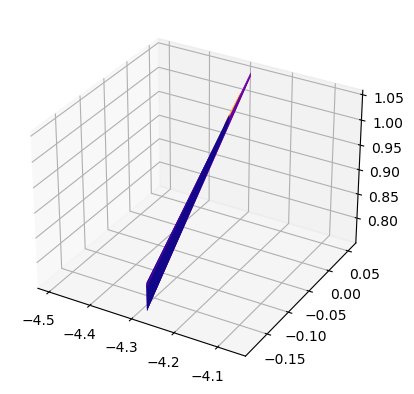

In [29]:
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,3], Y[:,2], Z, cmap='plasma')
plt.show()

In [22]:
#Ground state energy
ci = mol.apply("CISD").run()
ks = mol.apply("RKS").run()
ks
ci

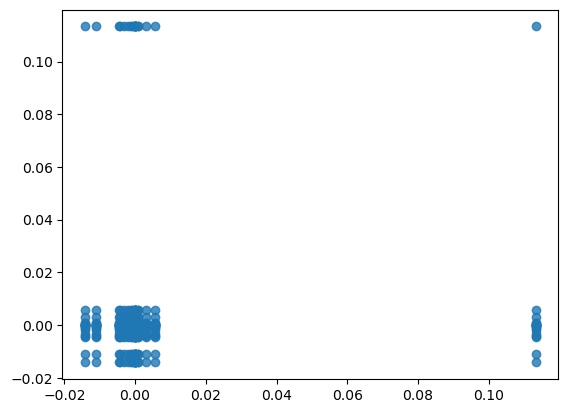

In [23]:
plt.scatter(X,Y , alpha=0.8)

In [24]:
#Excited states
ci.nstates = 5
td = tdscf.TDRKS(ks)
td.nstates = 5
td.run()

In [25]:
td

In [26]:
td = mol.apply("RKS").apply("TDA")
td.nstates = 5
td.run()
t_dip = td.transition_dipole()

In [27]:
t_dip.shape

(5, 3)

In [28]:
# Calcul des écarts d'énergie et des forces d'oscillateur
gap_S0_S1 = e[1] - e[0]  # Écart d'énergie entre S0 et S1

if len(z) > 1:  # Vérifier si des états excités ont été calculés
    gap_S0_T1 = e[2] - e[0]  # Écart d'énergie entre S0 et T1
    osc_S0_T1 = z[0][1]     # Force d'oscillateur entre S0 et T1
else:
    gap_S0_T1 = 0
    osc_S0_T1 = 0

# Affichage des résultats
print("Gap between S0 and S1:", gap_S0_S1)
print("Gap between S0 and T1:", gap_S0_T1)
#print("Oscillator strength between S0 and T1:", osc_S0_T1)

Gap between S0 and S1: 0.0073203972543071025
Gap between S0 and T1: 0.020173738566176262


In [35]:
# Supposons que vous ayez également les intensités de transition pour les états excités
intensity_S0_S1 = np.abs(z[0][1])**2  # Intensité de transition entre S0 et S1
intensity_S0_T1 = np.abs(z[2][0])**2  # Intensité de transition entre S0 et T1

# Supposons également que vous ayez la longueur d'onde de la lumière incidente
wavelength = 500  # Longueur d'onde en nanomètres

# Calcul de la PCE simplifiée
#PCE = (intensity_S0_S1 * gap_S0_S1 + intensity_S0_T1 * gap_S0_T1) / wavelength

# Affichage de la PCE
#print("Power Conversion Efficiency (PCE):", PCE)
#plt.plot(PCE)

In [30]:
import pce

In [31]:
pce?

Type:        module
String form: <module 'pce' from '/home/mvoto/anaconda3/lib/python3.10/site-packages/pce/__init__.py'>
File:        ~/anaconda3/lib/python3.10/site-packages/pce/__init__.py
Docstring:   <no docstring>

In [32]:
from pyscf import gto, dft, lib
from pyscf.dft import numint
from pyscf.dft import r_numint
)
ex_states = 5  # Nom))
ex_states = 5  # Nom
ex_states = 5  # Nom

In [33]:
dm = mf.make_rdm1()

# Use default mesh grids and weights
coords = mf.grids.coords
weights = mf.grids.weights
ao_value = numint.eval_ao(mol, coords, deriv=1)
# The first row of rho is electron density, the rest three rows are electron
# density gradients which are needed for GGA functional
rho = numint.eval_rho(mol, ao_value, dm, xctype='GGA')
print(rho.shape)


(4, 104104)


In [34]:
#
# Evaluate XC functional one by one.
# Note: to evaluate only correlation functional, put ',' before the functional name
#
ex, vx = dft.libxc.eval_xc('B88', rho)[:2]
ec, vc = dft.libxc.eval_xc(',P86', rho)[:2]
print('Exc = %.12f' % np.einsum('i,i,i->', ex+ec, rho[0], weights))


Exc = -33.919697623144


In [35]:

mf=scf.RKS(mol)
exc, vxc = dft.libxc.eval_xc('B88,P86', rho)[:2]
print('Exc = %.12f' % np.einsum('i,i,i->', exc, rho[0], weights))

#
# Evaluate XC functional for user specified functional
#
exc, vxc = dft.libxc.eval_xc('.2*HF + .08*SLATER + .72*B88, .81*LYP + .19*VWN', rho)[:2]
print('Exc = %.12f  ref = -7.520014202688' % np.einsum('i,i,i->', exc, rho[0], weights))

#

Exc = -33.919697623144
Exc = -27.302308534839  ref = -7.520014202688


In [36]:
mf = dft.GKS(mol).run()
dm_gks = mf.make_rdm1()
dm_a = dm_gks[:mol.nao, :mol.nao].real
dm_b = dm_gks[mol.nao:, mol.nao:].real
coords = mf.grids.coords
ao_value = mol.eval_gto('GTOval', coords)
rho = numint.eval_rho(mol, ao_value, dm_a + dm_b)
print(rho.shape)

#

(104104,)


In [ ]:
mf = dft.DKS(mol).run()
n2c = mol.nao * 2
dm = mf.make_rdm1()
dmLL = dm[:n2c,:n2c].copy()
dmSS = dm[n2c:,n2c:].copy()
coords = mf.grids.coords
# Large components
aoL_value = mol.eval_gto('GTOval_spinor', coords)
# Small components
aoS_value = 1/(2*lib.param.LIGHT_SPEED) * mol.eval_gto('GTOval_sp_spinor', coords)
# mL, mS are the spin-magentic moment at each point
rhoL, mL = r_numint.eval_rho(mol, aoL_value, dmLL)
rhoS, mS = r_numint.eval_rho(mol, aoS_value, dmSS)
rho = rhoL + rhoS
mx, my, mz = mL + mS